# Churn Rate Prediction

### Load data

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

In [16]:
# Load data from file
df = pd.read_csv('../data/df_model_final.csv')

In [17]:
# Browse dataset
df.head(10)

,uid,label,freq_P_last_1,freq_P_last_3,freq_P_last_7,freq_P_last_14,freq_P_last_30,freq_D_last_1,freq_D_last_3,freq_D_last_7,...,playtime__last_14,playtime__last_30,fav_songs__last_1,fav_songs__last_3,fav_songs__last_7,fav_songs__last_14,fav_songs__last_30,time_to_last_P,time_to_last_D,time_to_last_S
0,11596711,0,13,28,47,82,129,0,0,0,...,5938.0,11476.0,7,14,20,22,44,0,0,1
1,129766230,0,165,259,362,671,1339,0,0,0,...,120684.0,227298.0,37,94,159,360,745,0,0,0
2,167571220,1,0,0,0,0,32,0,0,0,...,0.0,5061.0,0,0,0,0,17,24,0,0
3,167572530,1,0,0,0,36,181,0,0,0,...,4484.0,25251.0,0,0,0,9,63,12,0,12
4,167586714,1,0,0,0,69,214,0,0,0,...,9606.0,30047.0,0,0,0,36,108,8,0,0
5,167589915,1,0,0,0,0,245,0,0,0,...,0.0,55791.0,0,0,0,0,217,15,0,0
6,167650198,0,10,10,47,88,239,0,0,0,...,14745.0,40736.0,9,9,23,53,145,0,22,8
7,167654524,0,0,7,7,7,8,0,0,0,...,1375.0,1595.0,0,3,3,3,4,2,0,0
8,167656040,0,0,0,0,0,39,0,0,0,...,0.0,9178.0,0,0,0,0,31,14,17,0
9,167659420,0,0,0,22,83,485,0,0,3,...,25337.0,102306.0,0,0,14,39,110,5,4,4


In [18]:
df.shape

(58064, 31)

In [19]:
# Show summary stats
df.describe()

,uid,label,freq_P_last_1,freq_P_last_3,freq_P_last_7,freq_P_last_14,freq_P_last_30,freq_D_last_1,freq_D_last_3,freq_D_last_7,...,playtime__last_14,playtime__last_30,fav_songs__last_1,fav_songs__last_3,fav_songs__last_7,fav_songs__last_14,fav_songs__last_30,time_to_last_P,time_to_last_D,time_to_last_S
count,5.806400e+04,58064.000000,58064.000000,58064.000000,58064.000000,58064.000000,58064.000000,58064.000000,58064.000000,58064.000000,...,5.806400e+04,5.806400e+04,58064.000000,58064.000000,58064.000000,58064.000000,58064.000000,58064.000000,58064.000000,58064.000000
mean,1.674754e+08,0.623209,3.421208,10.632853,23.811277,51.846394,142.358467,0.115338,0.341003,0.810382,...,1.351118e+05,4.500346e+05,1.824246,5.610258,12.474597,26.982829,70.137745,15.235430,6.892085,9.293331
std,9.918933e+06,0.484586,16.247517,41.755150,77.212436,145.959188,298.177029,2.442034,4.551073,8.470879,...,9.368320e+06,2.065793e+07,9.563448,23.311183,45.378240,87.340941,176.529865,11.491631,10.728422,11.413029
min,6.018300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.680397e+08,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000e+00,6.120000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000
50%,1.684980e+08,1.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.000000,0.000000,0.000000,...,0.000000e+00,3.960500e+03,0.000000,0.000000,0.000000,0.000000,11.000000,16.000000,0.000000,2.000000
75%,1.687746e+08,1.000000,0.000000,0.000000,9.000000,33.000000,140.000000,0.000000,0.000000,0.000000,...,4.015250e+03,1.984250e+04,0.000000,0.000000,2.000000,12.000000,58.250000,28.000000,13.000000,20.000000
max,1.692547e+08,1.000000,571.000000,2664.000000,3026.000000,4677.000000,4933.000000,277.000000,391.000000,591.000000,...,2.147488e+09,4.294979e+09,413.000000,964.000000,1220.000000,2127.000000,3548.000000,29.000000,29.000000,29.000000


In [20]:
df['device_type_1'] = (df['device_type'] == 1).astype(int)
df['device_type_2'] = (df['device_type'] == 2).astype(int)

### Acceleration Features

In [26]:
#Generate Ratio of frequency of different time window (acceleration), e.g.
# play_1d_over_play_7d, down_1d_over_play_1d,  play_1d_over_search_1d, down_1d_over_play_7d, play_1d_over_search_7d,

df['play_1d_over_play_7d'] = np.where(df['freq_P_last_7']==0, 0, df['freq_P_last_1']/df['freq_P_last_7'])
df['down_1d_over_play_1d'] = np.where(df['freq_P_last_1']==0,0,df['freq_D_last_1']/df['freq_P_last_1'])
df['play_1d_over_search_1d'] = np.where(df['freq_S_last_1']==0,0,df['freq_P_last_1']/df['freq_S_last_1'])
df['down_1d_over_play_7d'] = np.where(df['freq_P_last_7']==0,0,df['freq_D_last_1']/df['freq_P_last_7'])
df['play_1d_over_search_7d'] = np.where(df['freq_S_last_7']==0,0,df['freq_P_last_1']/df['freq_S_last_7'])

### Define Features and Target

In [27]:
selected_features = list(df.columns.values)

In [28]:
selected_features.remove('uid')
selected_features.remove('label')
selected_features.remove('device_type')
selected_features

['freq_P_last_1',
 'freq_P_last_3',
 'freq_P_last_7',
 'freq_P_last_14',
 'freq_P_last_30',
 'freq_D_last_1',
 'freq_D_last_3',
 'freq_D_last_7',
 'freq_D_last_14',
 'freq_D_last_30',
 'freq_S_last_1',
 'freq_S_last_3',
 'freq_S_last_7',
 'freq_S_last_14',
 'freq_S_last_30',
 'playtime__last_1',
 'playtime__last_3',
 'playtime__last_7',
 'playtime__last_14',
 'playtime__last_30',
 'fav_songs__last_1',
 'fav_songs__last_3',
 'fav_songs__last_7',
 'fav_songs__last_14',
 'fav_songs__last_30',
 'time_to_last_P',
 'time_to_last_D',
 'time_to_last_S',
 'device_type_1',
 'device_type_2',
 'play_1d_over_play_7d',
 'down_1d_over_play_1d',
 'play_1d_over_search_1d',
 'down_1d_over_play_7d',
 'play_1d_over_search_7d']

In [29]:
X = df[selected_features]
y = df['label']

In [30]:
X.shape

(58064, 35)

In [31]:
y[:10]

0    0
1    0
2    1
3    1
4    1
5    1
6    0
7    0
8    0
9    0
Name: label, dtype: int64

#### Let's Train-test split the data!

In [32]:
# import train test split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Train model using sklearn

In [33]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)


### Calculate the metric scores for the model

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [35]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [36]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

### Logistic Regression

              train      test
metrics                      
AUC        0.811139  0.823267
Accuracy   0.537857  0.546370
Precision  0.912890  0.921110
Recall     0.286454  0.294689
f1-score   0.436073  0.446522


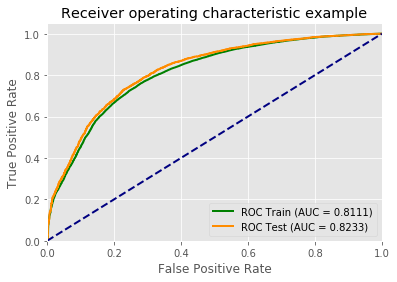

In [37]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(C=1.0, penalty='l2')
# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Random Forest

/Users/yihua/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


              train      test
metrics                      
AUC        0.921970  0.912305
Accuracy   0.852188  0.840179
Precision  0.860023  0.852442
Recall     0.911372  0.898072
f1-score   0.884953  0.874662


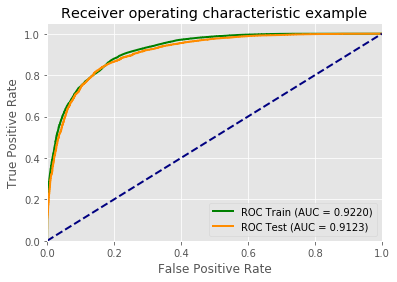

In [38]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': 50,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 20,
              'min_samples_split': 2,
              'min_samples_leaf': 20,
              'random_state': 0,
              'n_jobs': -1
              }

clf = RandomForestClassifier(**parameters)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

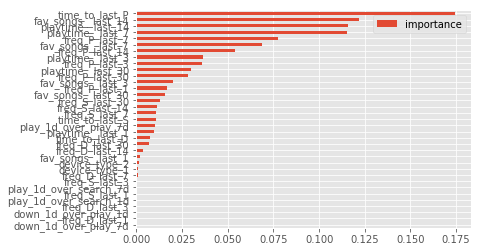

In [39]:
df_feature_importance = pd.DataFrame()
df_feature_importance['feature'] = selected_features
df_feature_importance['importance'] = clf.feature_importances_
df_feature_importance.sort_values('importance',inplace=True)

ax = df_feature_importance.plot.barh()
t = np.arange(len(df_feature_importance['feature']))
ax.set_yticks(t)
ax.set_yticklabels(df_feature_importance['feature'])
plt.show()

### Gradient Boosting Trees

              train      test
metrics                      
AUC        0.917515  0.911735
Accuracy   0.850897  0.840351
Precision  0.860832  0.854440
Recall     0.907714  0.895438
f1-score   0.883651  0.874458


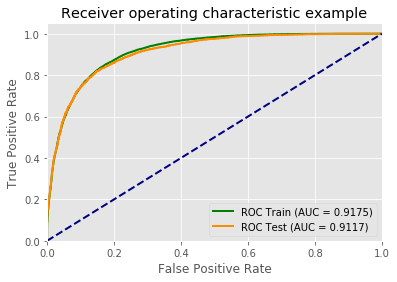

In [40]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
parameters = {
    'n_estimators': 100,
    'max_depth': 5,
    'learning_rate': 0.1,
    'random_state': 42
}

# parameters = {
#     'n_estimators': 50,
#     'max_depth': 5,
#     'learning_rate': 0.2,
#     'subsample': 0.7,
#     'max_features':0.8,
#     'random_state': 42
# }

clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### XGBoost


/Users/yihua/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yihua/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


              train      test
metrics                      
AUC        0.909511  0.910350
Accuracy   0.840305  0.839404
Precision  0.852135  0.853852
Recall     0.900190  0.894467
f1-score   0.875503  0.873688


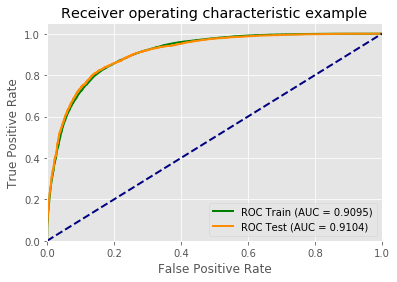

In [53]:
from xgboost import XGBClassifier
parameters = {
    'n_estimators': 200,
    'max_depth': 3,
    'learning_rate': 0.1,
    'random_state': 42,
    'subsample' :0.5
}

# parameters = {
#     'n_estimators': 50,
#     'max_depth': 5,
#     'learning_rate': 0.2,
#     'subsample': 0.7,
#     'max_features':0.8,
#     'random_state': 42
# }

clf = XGBClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Neural Network

              train      test
metrics                      
AUC        0.846112  0.843309
Accuracy   0.791366  0.792635
Precision  0.790891  0.795449
Recall     0.902168  0.898066
f1-score   0.842873  0.843649


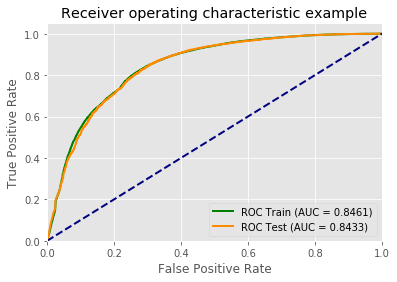

In [20]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
from sklearn.neural_network import MLPClassifier

# Choose some parameter combinations to try
parameters = {
    'solver':'adam', 
    'activation':'relu',
    'alpha':1e-5, #increase alpha->increase penalty :: http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py
    'hidden_layer_sizes':(5,5), 
    'learning_rate':'adaptive',
    'random_state':1
    }
clf = MLPClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### HyperParameter Tuning: Grid Search

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.954208  0.913710
Accuracy   0.902779  0.843451
Precision  0.898498  0.859294
Recall     0.951648  0.894328
f1-score   0.924309  0.876461


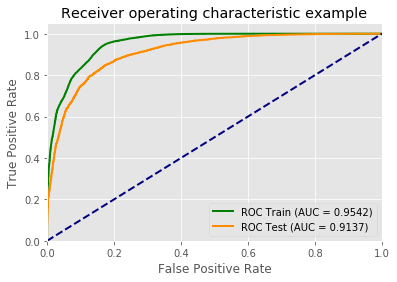

In [42]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

In [60]:

# Choose some parameter combinations to try
# parameters = {
#     'n_estimators': 75,
#     'max_depth': 6,
#     'learning_rate': 0.22,
#     'random_state': 42,
#     'subsample': 0.9,
#     'max_features':0.85
# }


# Choose the type of classifier. 
clf = XGBClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [100],
    'max_depth': [3,5],
    'learning_rate': [0.1],
    'random_state': [42],
    'subsample': [0.5]
    

             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

/Users/yihua/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yihua/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yihua/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yihua/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is a

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.5)

/Users/yihua/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yihua/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


              train      test
metrics                      
AUC        0.915801  0.911977
Accuracy   0.845816  0.841729
Precision  0.856224  0.853999
Recall     0.904745  0.898766
f1-score   0.879816  0.875811


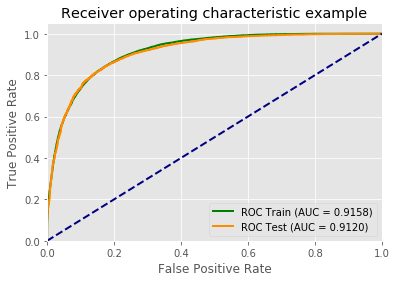

In [61]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

In [ ]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.5